### What does this code do

I ran a script that counted every image in the rock, paper, and scissors folders and divided them in the train, validation and test set (saving them in a new folder (processed)). I also generated a Bar Chart showing the distribution.

Doing this I found that the data consists of 2,188 images. **The classes are almost perfectly balanced (approx. 720 images per class), which prevents bias.**

In [1]:
import splitfolders
import os
import matplotlib.pyplot as plt

Reading RAW data from:   /Users/paolominini/Projects/rps-cnn-classifier/data/raw
Saving SPLIT data to:    /Users/paolominini/Projects/rps-cnn-classifier/data/processed

--- Data Exploration (Source) ---
 - rock: 726 images
 - paper: 712 images
 - scissors: 750 images


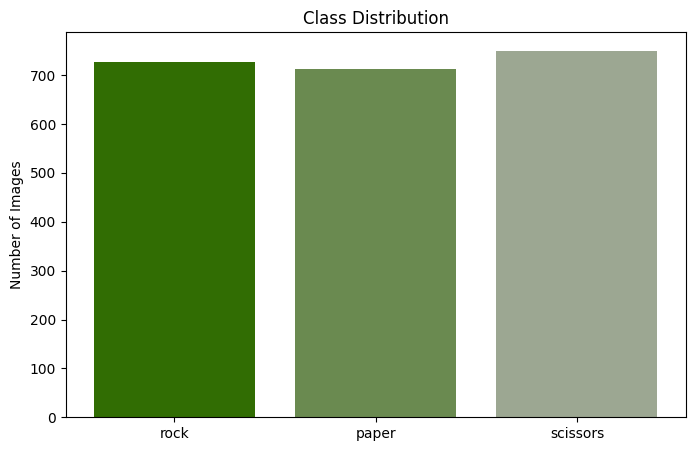


--- Splitting Data ---
SUCCESS!
Data split created at: /Users/paolominini/Projects/rps-cnn-classifier/data/processed


In [ ]:
# 1. SETUP PATHS
# INPUT: Read directly from your source drive (ignoring the project folder completely)
input_folder = '/Users/paolominini/Projects/rps-cnn-classifier/data/raw'

# OUTPUT: Save the split data into a new 'processed' folder right next to the original
output_folder = '/Users/paolominini/Projects/rps-cnn-classifier/data/processed'

# directory to save the class imbalance image
report_fig_dir = os.path.abspath('../reports/figures')
save_path = os.path.join(report_fig_dir, 'class_distribution.png')

print(f"Reading RAW data from:   {input_folder}")
print(f"Saving SPLIT data to:    {output_folder}")

# 2. CHECK & EXPLORE
if not os.path.exists(input_folder):
    print("ERROR: Source folder not found at the reported path.")
    print("Check: Is the external drive/folder name exactly correct?")
else:
    categories = ['rock', 'paper', 'scissors']
    counts = []
    
    # Check if subfolders exist
    all_good = True
    print("\n--- Data Exploration (Source) ---")
    for cat in categories:
        path = os.path.join(input_folder, cat)
        if os.path.exists(path):
            count = len(os.listdir(path))
            counts.append(count)
            print(f" - {cat}: {count} images")
        else:
            print(f" - {cat}: MISSING!")
            all_good = False

    # 3. VISUALIZE & SPLIT
    if all_good:
        # Show the chart
        plt.figure(figsize=(8, 5))
        plt.bar(categories, counts, color=['#316d03', '#6a8a50', '#9ca792'])
        plt.title("Class Distribution")
        plt.ylabel("Number of Images")
        
        # save the result
        plt.savefig(save_path, dpi=300)
        
        plt.show()

        # Execute Split
        print("\n--- Splitting Data ---")
        # 70% Train, 15% Val, 15% Test
        splitfolders.ratio(input_folder, output=output_folder, 
                           seed=42, ratio=(.7, .15, .15), 
                           group_prefix=None, move=False)
        print("SUCCESS!")
        print(f"Data split created at: {output_folder}")

Check the count of images and the split

In [ ]:
# 1. SETUP PATHS
base_dir = os.path.abspath('/Users/paolominini/Projects/rps-cnn-classifier/data/processed')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
# test_dir = os.path.join(base_dir, 'test') # Uncomment if you have a test folder

# 2. FUNCTION TO COUNT
def count_files(directory):
    total = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                total += 1
    return total

# 3. PRINT RESULTS
print(f"Training Images:   {count_files(train_dir)}")
print(f"Validation Images: {count_files(val_dir)}")
print(f"Test Images: {count_files(test_dir)}")
# print(f"Test Images:       {count_files(test_dir)}") # Uncomment if needed

total_img = count_files(train_dir) + count_files(val_dir) + count_files(test_dir) # + count_files(test_dir)
print(f"------\nTotal Images:      {total_img}")

Training Images:   1531
Validation Images: 326
Test Images: 331
------
Total Images:      2188
